In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # For any numerical operations if needed
import os

# For nicer plots (optional, but good practice)
plt.style.use('seaborn-v0_8-whitegrid') # or 'ggplot', 'seaborn-v0_8-darkgrid' etc.
# sns.set_palette("viridis") # Example color palette

# --- Database Connection ---
project_root = os.getcwd() # Assuming notebook is at project root OR adjust as needed
db_file_name = "perovskite_platform.sqlite"
db_path = os.path.join(project_root, "data", "processed", db_file_name)

conn = None
try:
    conn = sqlite3.connect(db_path)
    print(f"Successfully connected to SQLite database: {db_path}")
except sqlite3.Error as e:
    print(f"Error connecting to database {db_path}: {e}")
    conn = None 

# --- Define the order of x_values for consistent plotting ---
# This is important if you want your x-axis to always go from 0 to 6
ORDERED_X_VALUES = sorted([0, 1, 2, 3, 4, 5, 6]) 

Successfully connected to SQLite database: c:\Users\E1009134\OneDrive - ams OSRAM\Portfolio_ San\Cs2NaTlBr6-xClx\data\processed\perovskite_platform.sqlite


In [2]:
import sqlite3
import pandas as pd
import os

# Assuming project_root and db_path are defined as before
# project_root = os.getcwd() 
# db_file_name = "perovskite_platform.sqlite"
# db_path = os.path.join(project_root, "data", "processed", db_file_name)

# --- Connect to the Database (Do this once at the start of your testing/validation) ---
conn = None
try:
    # Re-establish connection logic (ensure db_path is defined)
    project_root = os.getcwd() if 'project_root' not in locals() else project_root
    db_file_name = "perovskite_platform.sqlite" if 'db_file_name' not in locals() else db_file_name
    db_path = os.path.join(project_root, "data", "processed", db_file_name) if 'db_path' not in locals() else db_path
    
    conn = sqlite3.connect(db_path)
    print(f"Successfully connected to SQLite database: {db_path}")
except sqlite3.Error as e:
    print(f"Error connecting to database {db_path}: {e}")
    conn = None # Ensure conn is None if connection fails

# --- Now, the corrected part for checking a specific table ---

if conn: # Proceed only if connection was successful
    
    # --- Example 1: Checking a specific table, e.g., 'BandStructureData' ---
    table_to_check = 'BandStructureData' 
    print(f"\n--- Checking first 5 rows of table: '{table_to_check}' ---")
    try:
        # Construct the SQL query safely
        # It's generally safer to not use f-strings directly for table names if user input is involved,
        # but since table_to_check is hardcoded here by you, it's acceptable for this script.
        # For user input, you'd validate table_to_check against a list of known tables first.
        query = f"SELECT * FROM \"{table_to_check}\" ORDER BY material_x_value LIMIT 5" # Double quotes for table name if it contains special chars (not needed here)
        
        # Fetch data into a Pandas DataFrame
        df_sample = pd.read_sql_query(query, conn)
        
        if not df_sample.empty:
            print(f"DataFrame info for '{table_to_check}':")
            df_sample.info()
            print(f"\nSample data from '{table_to_check}':")
            print(df_sample.to_string()) # Print full DataFrame for sample
        else:
            print(f"Table '{table_to_check}' is empty or query returned no results.")
            
    except pd.io.sql.DatabaseError as e: # Specifically for pandas SQL errors
        print(f"  Pandas SQL Error querying table '{table_to_check}': {e}")
        print(f"  Query was: {query}")
    except sqlite3.Error as e: # For general SQLite errors
        print(f"  SQLite Error querying table '{table_to_check}': {e}")
    except Exception as e: # Catch any other unexpected error
        print(f"  An unexpected error occurred while checking table '{table_to_check}': {e}")

    # --- Example 2: Looping to check first few rows of ALL your main tables ---
    tables_to_sample = [
        'Materials', 
        'BandStructureData', 
        'KLabelsData', 
        'HighSymmetryPointsData', 
        'OpticalSpectraData', 
        'DensityOfStatesData'
    ]
    
    print("\n\n--- Sampling first 5 rows from all key tables ---")
    for table_name in tables_to_sample:
        print(f"\n--- Table: {table_name} ---")
        try:
            query = f"SELECT * FROM \"{table_name}\" LIMIT 5" # Get first 5 rows
            df = pd.read_sql_query(query, conn)
            if not df.empty:
                print(df.to_string())
            else:
                print("Table is empty or does not exist / query error.")
        except Exception as e: # Catch-all for this loop for simplicity
            print(f"Could not sample table '{table_name}': {e}")

        
else:
    print("Cannot perform checks: Database connection was not established.")

Successfully connected to SQLite database: c:\Users\E1009134\OneDrive - ams OSRAM\Portfolio_ San\Cs2NaTlBr6-xClx\data\processed\perovskite_platform.sqlite

--- Checking first 5 rows of table: 'BandStructureData' ---
DataFrame info for 'BandStructureData':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   material_x_value  5 non-null      int64  
 1   calc_type         5 non-null      object 
 2   k_distance        5 non-null      float64
 3   band_index        5 non-null      int64  
 4   energy_ev         5 non-null      float64
dtypes: float64(2), int64(2), object(1)
memory usage: 332.0+ bytes

Sample data from 'BandStructureData':
   material_x_value calc_type  k_distance  band_index  energy_ev
0                 0       GGA      0.0000           1   -22.4132
1                 0       GGA      0.0204           1   -22.4132
2             

Analyze Scalar Properties from the Materials Table

In [3]:
if conn:
    materials_df = pd.read_sql_query("SELECT * FROM Materials ORDER BY material_x_value", conn)
    print("Materials Data (Scalar Properties):")
    materials_df.info()
    print(materials_df.to_string()) # Print full DataFrame
else:
    materials_df = pd.DataFrame() # Empty df if no connection

Materials Data (Scalar Properties):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   material_x_value               7 non-null      int64  
 1   material_formula               7 non-null      object 
 2   band_character                 7 non-null      object 
 3   direct_gap_ev                  6 non-null      float64
 4   indirect_gap_ev                7 non-null      float64
 5   fermi_energy_ev                7 non-null      float64
 6   bulk_modulus_k_hill_gpa        7 non-null      float64
 7   shear_modulus_g_hill_gpa       7 non-null      float64
 8   youngs_modulus_e_hill_gpa      7 non-null      float64
 9   p_wave_modulus_hill_gpa        7 non-null      float64
 10  poissons_ratio_v_hill          7 non-null      float64
 11  bulk_shear_ratio_hill          7 non-null      float64
 12  isotropic_poissons

Plot Key Scalar Properties vs. material_x_value

Generating a 7x3 grid for 20 properties.


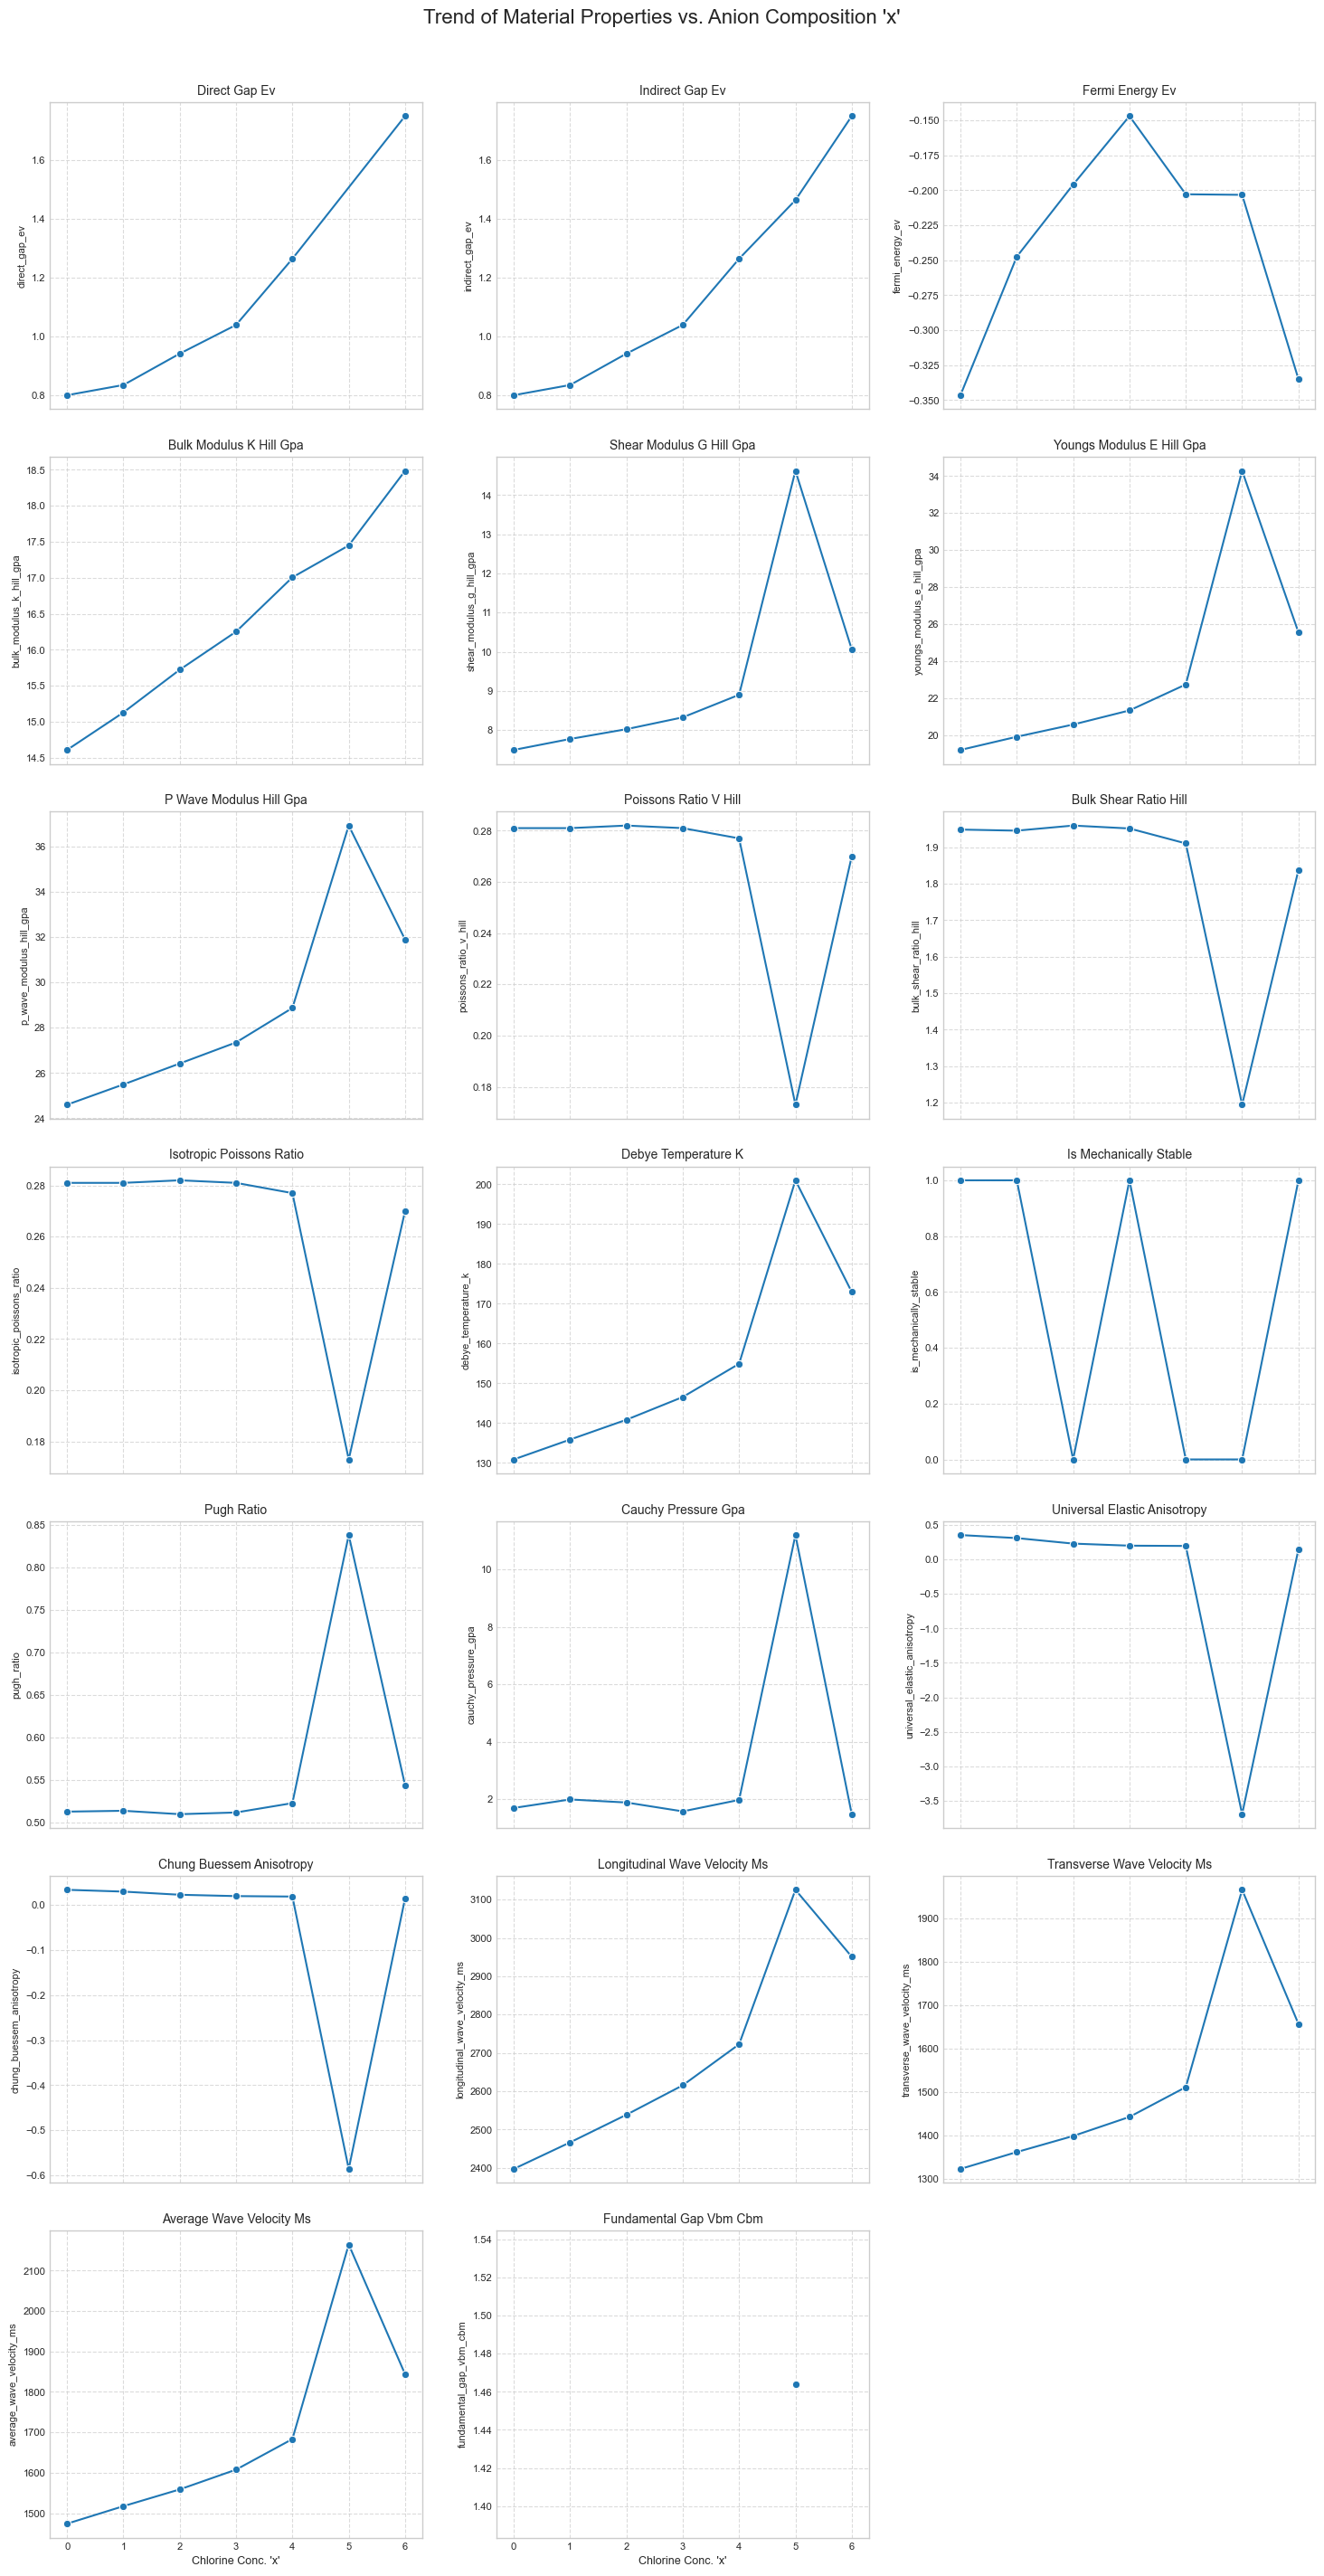

In [4]:
# Assuming 'materials_df' is loaded and 'conn' is your database connection from previous cells
# And ORDERED_X_VALUES = [0, 1, 2, 3, 4, 5, 6] is defined

if not materials_df.empty:
    # --- Select numeric properties to plot (excluding 'material_id' if it exists and 'material_x_value') ---
    # We will use 'material_x_value' as the x-axis for all subplots.
    
    # List of columns we want to plot on the y-axis of subplots
    # We can get this dynamically by selecting float64 and int64 columns, then removing 'material_x_value'
    numeric_columns_to_plot = materials_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Remove 'material_x_value' itself from this list as it's our x-axis
    if 'material_x_value' in numeric_columns_to_plot:
        numeric_columns_to_plot.remove('material_x_value')
    # Also remove 'material_id' if it was somehow included (it shouldn't be if it was index)
    if 'material_id' in numeric_columns_to_plot:
        numeric_columns_to_plot.remove('material_id')

    # --- Determine grid size ---
    num_plots = len(numeric_columns_to_plot)
    # Let's aim for a grid that's somewhat square, or with a fixed number of columns
    # For example, let's try for 3 or 4 columns wide
    
    cols_per_row = 3 # You can adjust this (e.g., to 2 or 4)
    num_rows = (num_plots + cols_per_row - 1) // cols_per_row # Ceiling division to get enough rows

    if num_plots == 0:
        print("No numeric properties selected for plotting.")
    else:
        print(f"Generating a {num_rows}x{cols_per_row} grid for {num_plots} properties.")

        # --- Create the subplots ---
        fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, 
                                 figsize=(cols_per_row * 5, num_rows * 4), # Adjust figsize as needed
                                 sharex=True) # All subplots will share the same x-axis

        # Flatten the 'axes' array for easier iteration, especially if num_rows or ncols is 1
        axes = axes.flatten() 

        for i, prop_name in enumerate(numeric_columns_to_plot):
            ax = axes[i] # Get the current subplot axis
            
            # Create a line plot with markers for the current property
            sns.lineplot(data=materials_df, x='material_x_value', y=prop_name, marker='o', ax=ax, legend=False)
            
            ax.set_title(prop_name.replace('_', ' ').title(), fontsize=10) # Prettier title
            ax.set_ylabel(prop_name, fontsize=8) # Y-label is the property name
            ax.tick_params(axis='y', labelsize=8)
            ax.grid(True, linestyle='--', alpha=0.7)

            # Only set x-label for plots in the last row for cleaner look
            if i >= num_plots - cols_per_row : # If in the last visual row of plots
                 ax.set_xlabel("Chlorine Conc. 'x'", fontsize=9)
            
            ax.set_xticks(ORDERED_X_VALUES) # Ensure all x-values from 0-6 are ticks
            ax.tick_params(axis='x', labelsize=8)


        # --- Hide any unused subplots if the grid isn't perfectly filled ---
        for j in range(num_plots, num_rows * cols_per_row):
            fig.delaxes(axes[j])

        plt.tight_layout(pad=2.0) # Adjust padding between subplots
        fig.suptitle("Trend of Material Properties vs. Anion Composition 'x'", fontsize=16, y=1.02) # Overall title
        plt.show()

else:
    print("Materials DataFrame is empty. Cannot generate subplot grid.")

Correlation Matrix Heatmap

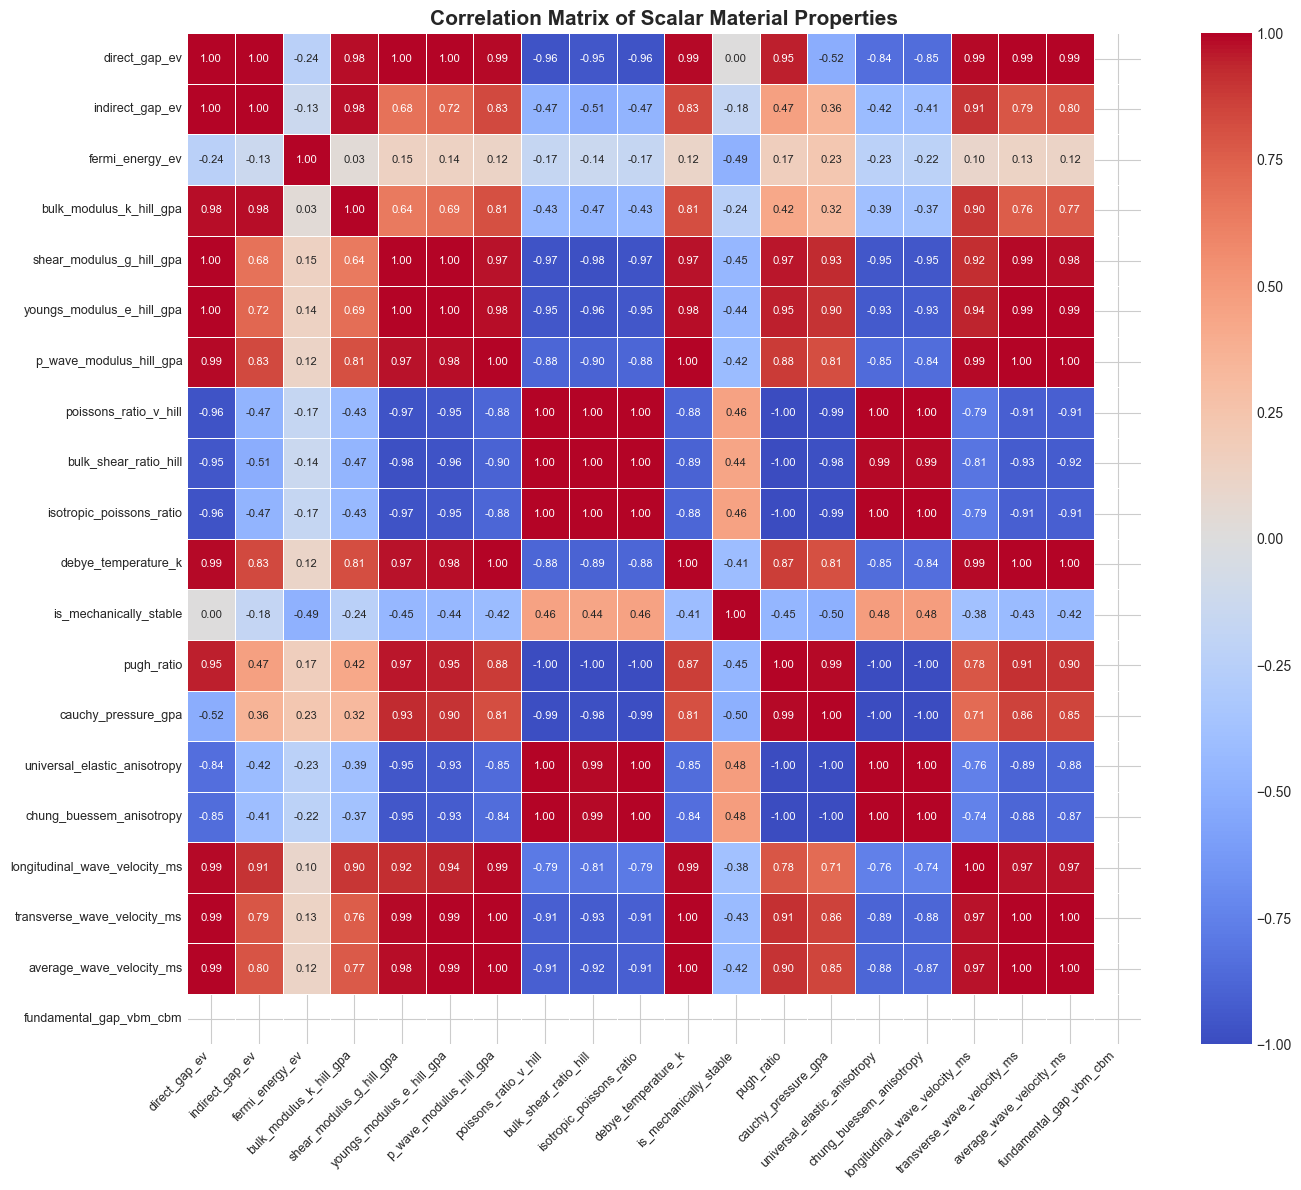

In [5]:
if not materials_df.empty:
    # Select numeric columns for correlation. Exclude IDs and 'x' value itself if desired,
    # or include 'x' to see how other properties correlate with composition.
    numeric_props_for_corr = materials_df.select_dtypes(include=np.number).copy()
    if 'material_x_value' in numeric_props_for_corr.columns:
        numeric_props_for_corr.drop(columns=['material_x_value'], inplace=True)
    
    if len(numeric_props_for_corr.columns) > 1:
        correlation_matrix = numeric_props_for_corr.corr()
        
        plt.figure(figsize=(14, 12)) # Larger figure for more properties
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1, center=0, annot_kws={"size": 8})
        plt.title("Correlation Matrix of Scalar Material Properties", fontsize=15, fontweight='bold')
        plt.xticks(rotation=45, ha='right', fontsize=9)
        plt.yticks(rotation=0, fontsize=9)
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough numeric properties for correlation matrix.")
else:
    print("Materials DataFrame is empty. Cannot create correlation matrix.")


# Close the database connection if it was opened
#if conn:    
    #conn.close()
    #print("Database connection closed.")    

Overlayed Total Density of States (TDOS)


--- Plotting Overlayed Total Density of States (TDOS) - Raw Energies ---


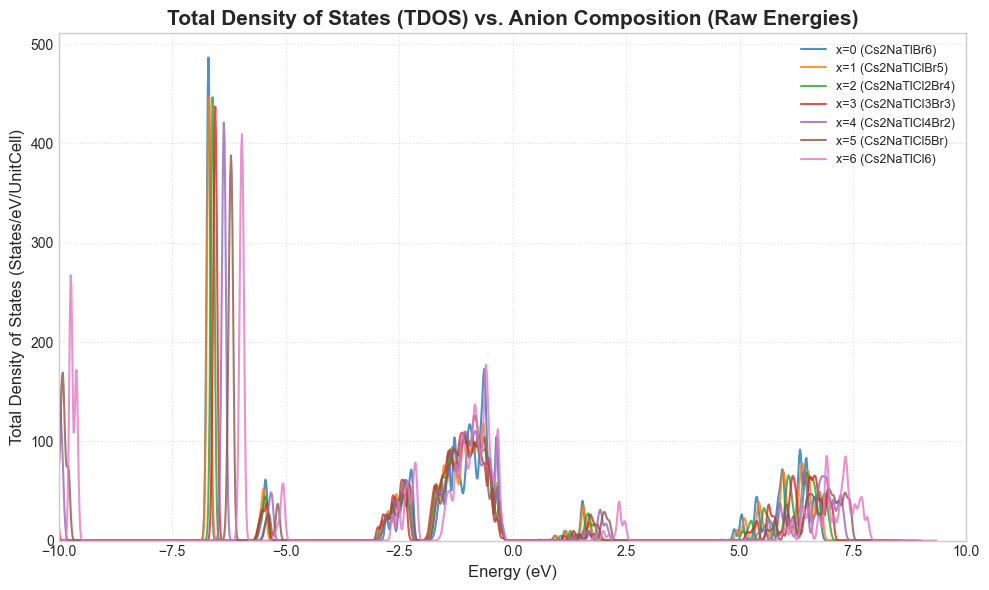

In [6]:
# Cell 6: Overlayed Total Density of States (TDOS) - RAW ENERGY PLOT

if conn: # Check if connection object 'conn' exists and is not None
    x_values_to_plot = ORDERED_X_VALUES # Plot for all
    
    plt.figure(figsize=(10, 6))
    print("\n--- Plotting Overlayed Total Density of States (TDOS) - Raw Energies ---")

    # To store min and max energies found across all DOS plots for common y-axis scaling (optional)
    # all_dos_energies = [] 

    for x_val in x_values_to_plot:
        # Fetch TDOS data for the current x_val
        # **Adjust column names if your schema for DensityOfStatesData is different**
        # Specifically 'energy_ev' and 'total_dos'
        query = f"SELECT Energy_eV, tdos FROM DensityOfStatesData WHERE material_x_value = {x_val} ORDER BY Energy_eV"
        try:
            dos_df = pd.read_sql_query(query, conn)
        except Exception as e:
            print(f"  Error querying DOS data for x={x_val}: {e}")
            dos_df = pd.DataFrame() # ensure dos_df is defined

        if not dos_df.empty and 'tdos' in dos_df.columns and 'Energy_eV' in dos_df.columns:
            # NO SHIFTING BY FERMI LEVEL HERE
            raw_energy_axis = dos_df['Energy_eV'] 
            
            # Store energies for determining overall plot limits later (optional)
            # all_dos_energies.extend(raw_energy_axis.tolist())

            # Get formula for label (assuming materials_df is loaded)
            formula_label = "Unknown Formula"
            if not materials_df.empty and 'material_formula' in materials_df.columns:
                formula_series = materials_df.loc[materials_df['material_x_value'] == x_val, 'material_formula']
                if not formula_series.empty:
                    formula_label = formula_series.iloc[0]
            
            plt.plot(raw_energy_axis, dos_df['tdos'], label=f"x={x_val} ({formula_label})", lw=1.5, alpha=0.8)
        else:
            print(f"  No TDOS data found or required columns ('energy_ev', 'total_dos') missing for x={x_val}.")

    # plt.axvline(0, color='black', linestyle='--', linewidth=1, label='Reference E=0') # If desired, but not Fermi
    plt.xlabel("Energy (eV)", fontsize=12) # Changed label
    plt.ylabel("Total Density of States (States/eV/UnitCell)", fontsize=12)
    plt.title("Total Density of States (TDOS) vs. Anion Composition (Raw Energies)", fontsize=15, fontweight='bold')
    
    if plt.gca().has_data(): # Only add legend and grid if something was plotted
        plt.legend(fontsize=9, loc='upper right')
        plt.grid(True, linestyle=':', alpha=0.6)
    
    # Determine sensible x-limits if data was plotted
    # if all_dos_energies:
    #     min_e, max_e = min(all_dos_energies), max(all_dos_energies)
    #     padding = (max_e - min_e) * 0.05
    #     plt.xlim(min_e - padding, max_e + padding)
    # else:
    # Fallback xlim if no data or difficult to determine dynamic range
    plt.xlim(-10, 10) # You will need to adjust this based on your typical DOS energy range

    plt.ylim(bottom=0) 
    plt.tight_layout()
    plt.show()
else:
    print("Database connection not established. Cannot plot TDOS.")

3D Interactive Scatter Plot 

In [7]:
print("Columns available in materials_df:")
print(list(materials_df.columns))

Columns available in materials_df:
['material_x_value', 'material_formula', 'band_character', 'direct_gap_ev', 'indirect_gap_ev', 'fermi_energy_ev', 'bulk_modulus_k_hill_gpa', 'shear_modulus_g_hill_gpa', 'youngs_modulus_e_hill_gpa', 'p_wave_modulus_hill_gpa', 'poissons_ratio_v_hill', 'bulk_shear_ratio_hill', 'isotropic_poissons_ratio', 'debye_temperature_k', 'is_mechanically_stable', 'pugh_ratio', 'cauchy_pressure_gpa', 'universal_elastic_anisotropy', 'chung_buessem_anisotropy', 'longitudinal_wave_velocity_ms', 'transverse_wave_velocity_ms', 'average_wave_velocity_ms', 'fundamental_gap_vbm_cbm']



--- Plotting Band Structure for Cs2NaTlBr6 (x=0) ---
  Using Fermi Level: -0.3465 eV for shifting.


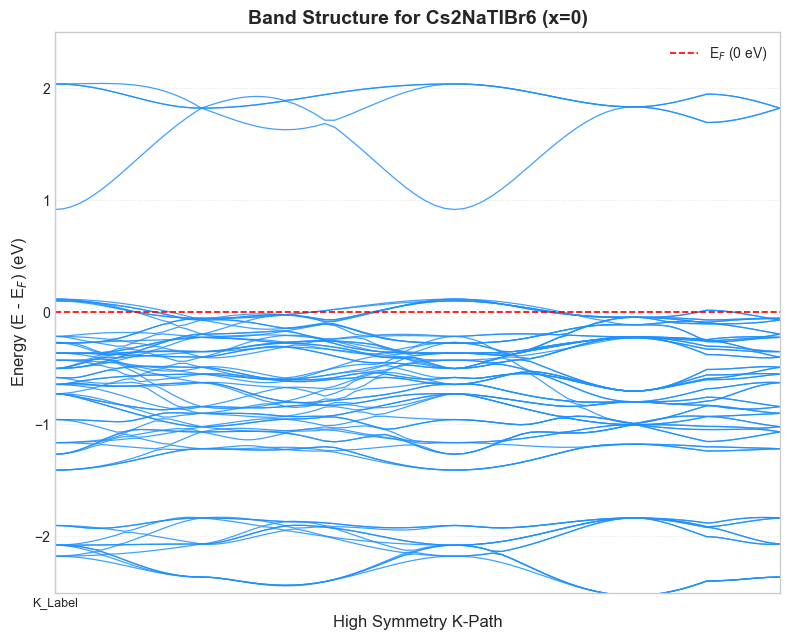


--- Plotting Band Structure for Cs2NaTlClBr5 (x=1) ---
  Using Fermi Level: -0.2475 eV for shifting.


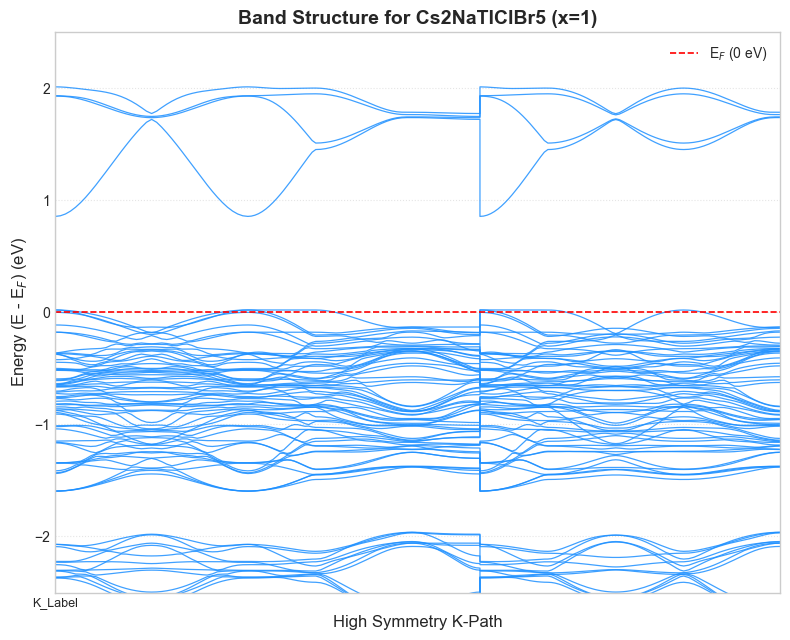


--- Plotting Band Structure for Cs2NaTlCl2Br4 (x=2) ---
  Using Fermi Level: -0.1960 eV for shifting.


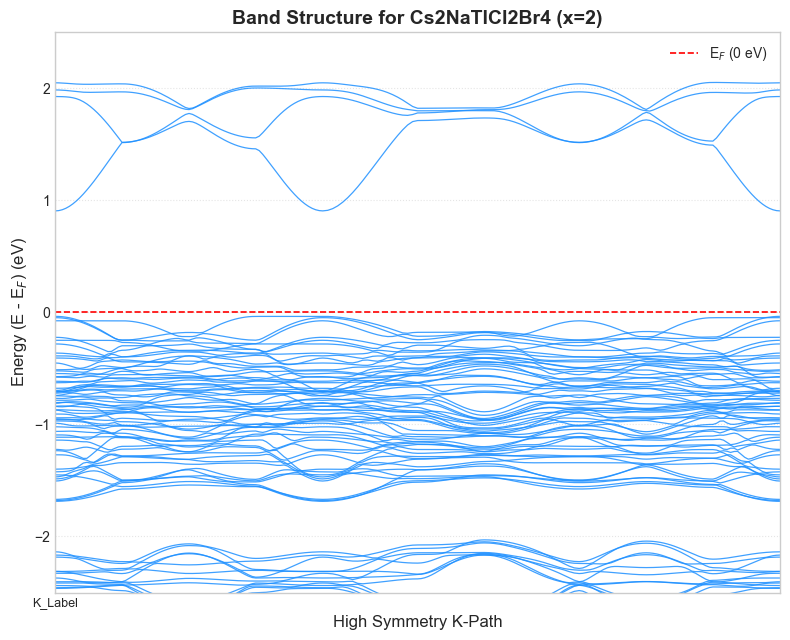


--- Plotting Band Structure for Cs2NaTlCl3Br3 (x=3) ---
  Using Fermi Level: -0.1470 eV for shifting.


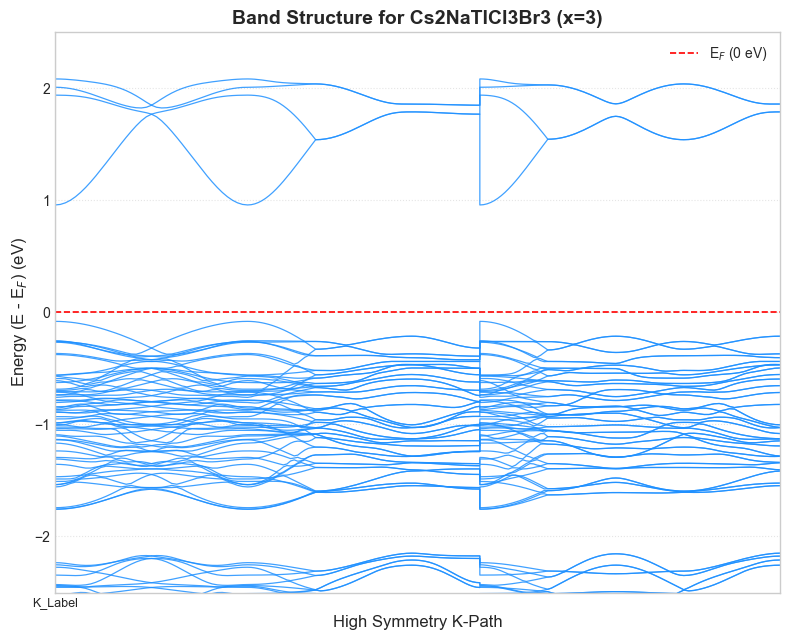


--- Plotting Band Structure for Cs2NaTlCl4Br2 (x=4) ---
  Using Fermi Level: -0.2029 eV for shifting.


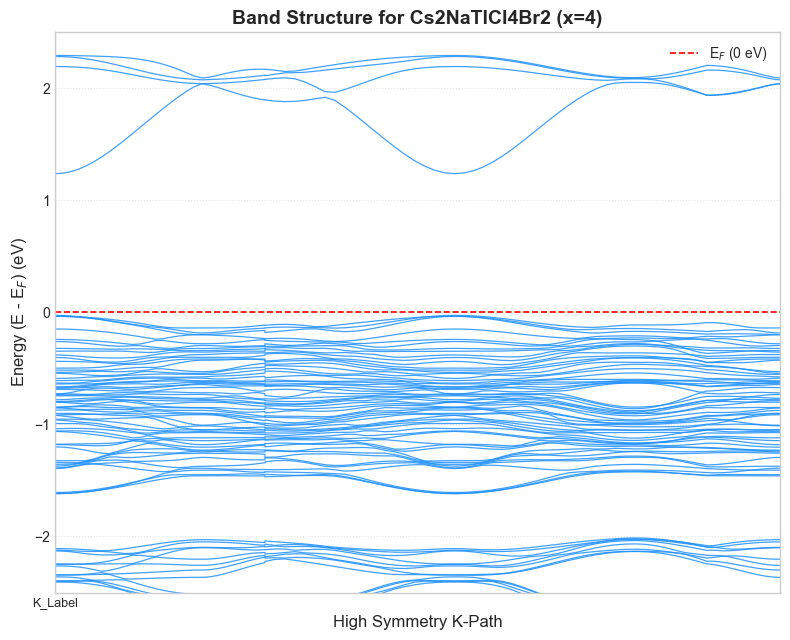


--- Plotting Band Structure for Cs2NaTlCl5Br (x=5) ---
  Using Fermi Level: -0.2033 eV for shifting.


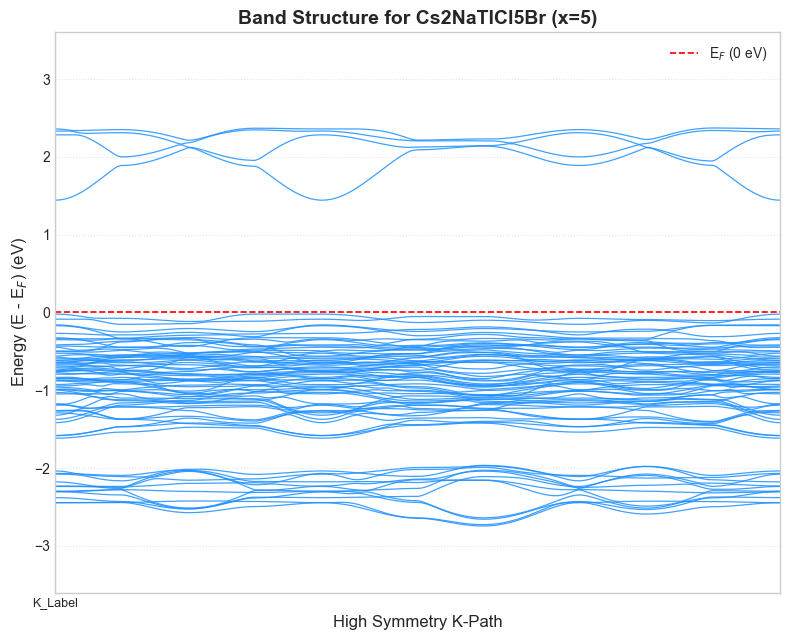


--- Plotting Band Structure for Cs2NaTlCl6 (x=6) ---
  Using Fermi Level: -0.3350 eV for shifting.


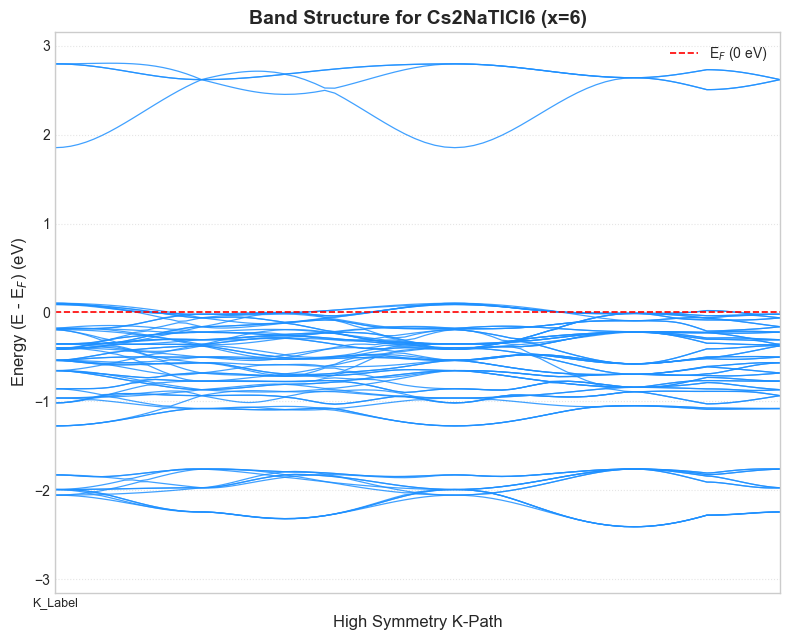

In [12]:
# In your Jupyter Notebook (01_EDA_and_Trend_Analysis.ipynb)

def plot_band_structure_simple(x_val_to_plot, connection, materials_info_df):
    """Plots the band structure for a given material x_value.
    Shifts energies by Fermi level if available, otherwise plots raw energies."""
    if connection is None:
        print("Database connection not available for band structure plot.")
        return
    
    # Initialize variables
    formula_for_title = f"Material x={x_val_to_plot}"
    fermi_level_actual = np.nan # Use NaN to indicate not found initially
    direct_gap_for_ylim = 2.0   # Default gap for y-scaling if not found

    # --- Attempt to fetch scalar properties for this material ---
    if not materials_info_df.empty:
        material_row = materials_info_df[materials_info_df['material_x_value'] == x_val_to_plot]
        if not material_row.empty:
            formula_for_title = material_row['material_formula'].iloc[0]
            
            if 'fermi_energy_ev' in material_row.columns and pd.notna(material_row['fermi_energy_ev'].iloc[0]):
                fermi_level_actual = material_row['fermi_energy_ev'].iloc[0]
            
            if 'direct_gap_ev' in material_row.columns and pd.notna(material_row['direct_gap_ev'].iloc[0]):
                direct_gap_for_ylim = material_row['direct_gap_ev'].iloc[0]
    
    print(f"\n--- Plotting Band Structure for {formula_for_title} (x={x_val_to_plot}) ---")
    if pd.notna(fermi_level_actual):
        print(f"  Using Fermi Level: {fermi_level_actual:.4f} eV for shifting.")
    else:
        print(f"  INFO: Fermi energy for x={x_val_to_plot} is not available or NaN. Plotting raw band energies.")

    # --- Fetch band data for the selected material ---
    bands_query = (
        f"SELECT k_distance, band_index, energy_ev FROM BandStructureData "
        f"WHERE material_x_value = {x_val_to_plot} " # Assuming no calc_type differentiation needed
        f"ORDER BY k_distance, band_index" 
    )
    try:
        current_material_bands_df = pd.read_sql_query(bands_query, connection)
    except Exception as e:
        print(f"  Error querying BandStructureData for x={x_val_to_plot}: {e}")
        current_material_bands_df = pd.DataFrame()

    if current_material_bands_df.empty:
        print(f"  No band structure data found to plot for x={x_val_to_plot}.")
        return

    # --- Fetch KLabels for x-axis ticks ---
    klabels_query = (
        f"SELECT \"K_Label\" AS k_label, \"K_Coordinate\" AS k_coord FROM KLabelsData "
        f"WHERE material_x_value = {x_val_to_plot} "
        f"ORDER BY \"K_Coordinate\""
    )
    try:
        klabels_df_current_material = pd.read_sql_query(klabels_query, connection)
        # No need to rename if SQL AS is used, but good practice if CSV had original names:
        # klabels_df_current_material.rename(columns={"K_Label": "k_label", "K_Coordinate": "k_coord"}, inplace=True, errors='ignore')
    except Exception as e:
        print(f"  Error querying KLabelsData for x={x_val_to_plot}: {e}")
        klabels_df_current_material = pd.DataFrame()

    # --- Plotting ---
    plt.figure(figsize=(8, 6.5)) # Slightly adjusted size for better labels
    
    energy_shift_value = fermi_level_actual if pd.notna(fermi_level_actual) else 0.0
    
    unique_band_indices = sorted(current_material_bands_df['band_index'].unique())
    for band_idx in unique_band_indices:
        band_data = current_material_bands_df[current_material_bands_df['band_index'] == band_idx]
        plt.plot(band_data['k_distance'], band_data['energy_ev'] - energy_shift_value, 
                 color='dodgerblue', lw=0.9, alpha=0.85)

    # Set Y-axis label and Fermi line based on whether shifting occurred
    if pd.notna(fermi_level_actual):
        plt.ylabel("Energy (E - E$_F$) (eV)", fontsize=12)
        plt.axhline(0, color='red', linestyle='--', linewidth=1.2, label='E$_F$ (0 eV)')
        plt.legend(fontsize=10)
        # Dynamic y-limits around the (shifted) Fermi level / band gap
        plot_ymin = -max(2.5, direct_gap_for_ylim * 1.8 if pd.notna(direct_gap_for_ylim) else 2.5) 
        plot_ymax = max(2.5, direct_gap_for_ylim * 1.8 if pd.notna(direct_gap_for_ylim) else 2.5)  
    else: # Raw energies plotted
        plt.ylabel("Energy (eV) [Raw]", fontsize=12)
        # Sensible default y-limits for raw energies, might need adjustment
        # Use min/max of a relevant energy window from the bands
        relevant_energies = current_material_bands_df['energy_ev'][
            (current_material_bands_df['energy_ev'] > -15) & (current_material_bands_df['energy_ev'] < 10)
        ]
        if not relevant_energies.empty:
            plot_ymin = relevant_energies.min() - 1 # Add some padding
            plot_ymax = relevant_energies.max() + 1
        else: # Fallback if no data in that window
            plot_ymin = -10
            plot_ymax = 10
    plt.ylim(plot_ymin, plot_ymax) 
    
    # X-axis labels and ticks
    plt.xlabel("High Symmetry K-Path", fontsize=12)
    if not klabels_df_current_material.empty and 'k_coord' in klabels_df_current_material.columns and 'k_label' in klabels_df_current_material.columns:
        unique_k_coords_plot = []
        unique_k_labels_plot = []
        for k_coord_val, label_group in klabels_df_current_material.groupby('k_coord'):
            unique_k_coords_plot.append(k_coord_val)
            unique_k_labels_plot.append(" | ".join(label_group['k_label'].unique()))
            plt.axvline(x=k_coord_val, color='grey', linestyle=':', linewidth=0.7, alpha=0.6)
        plt.xticks(unique_k_coords_plot, unique_k_labels_plot, fontsize=9)
    
    if not current_material_bands_df.empty: # Ensure xlim is set if data was plotted
         plt.xlim(current_material_bands_df['k_distance'].min(), current_material_bands_df['k_distance'].max())
    
    plt.title(f"Band Structure for {formula_for_title} (x={x_val_to_plot})", fontsize=14, fontweight='bold')
    plt.grid(True, axis='y', linestyle=':', alpha=0.5)
    plt.tight_layout()
    plt.show()

# --- Example usage: Loop through all your x_values ---
if conn and not materials_df.empty:
    for x_value_to_iterate in ORDERED_X_VALUES:
        plot_band_structure_simple(
            x_val_to_plot=x_value_to_iterate, 
            connection=conn, 
            materials_info_df=materials_df
        )
else:
    print("Cannot generate band structure plots: Database connection ('conn') not established or 'materials_df' is empty.")

Band Gap Trend vs. Composition 'x'


--- Visualizing Band Gap Trend vs. Anion Composition 'x' ---


C:\Users\E1009134\AppData\Local\Temp\ipykernel_6800\2622426076.py:53: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\E1009134\AppData\Local\Temp\ipykernel_6800\2622426076.py:53: UserWarning: Glyph 8326 (\N{SUBSCRIPT SIX}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\E1009134\AppData\Local\Temp\ipykernel_6800\2622426076.py:53: UserWarning: Glyph 8331 (\N{SUBSCRIPT MINUS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\E1009134\OneDrive - ams OSRAM\Portfolio_ San\Cs2NaTlBr6-xClx\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\E1009134\OneDrive - ams OSRAM\Portfolio_ San\Cs2NaTlBr6-xClx\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8326 (\N{SUBSCRIPT SIX}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\E1009134\OneDrive - am

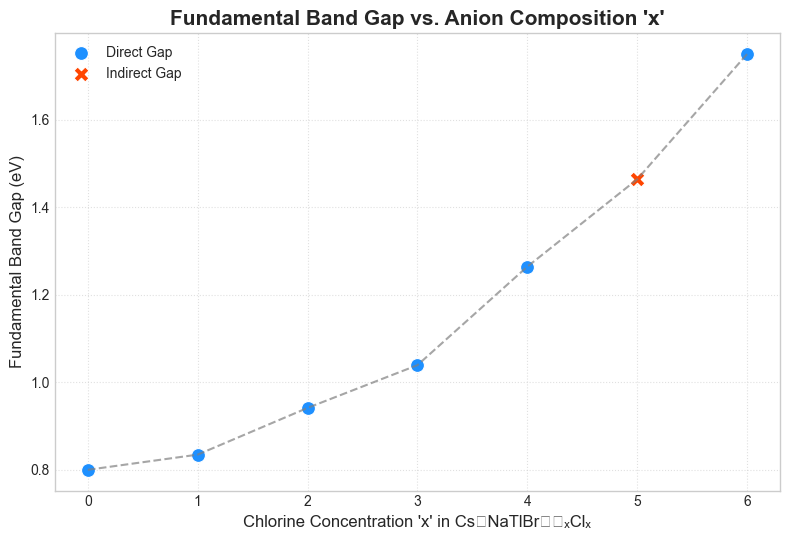

In [10]:
if not materials_df.empty:
    print("\n--- Visualizing Band Gap Trend vs. Anion Composition 'x' ---")
    
    plt.figure(figsize=(8, 5.5))

    # Plotting direct_gap_ev for direct materials
    # Plotting indirect_gap_ev for indirect materials (x=5)
    # We can create a 'fundamental_gap_ev' column for plotting clarity
    
    # Create a temporary column for the fundamental gap based on 'band_character'
    # If band_character is 'Direct', use direct_gap_ev.
    # If band_character is 'Indirect', use indirect_gap_ev.
    # If band_character is None but direct_gap_ev exists, use direct_gap_ev.
    
    plot_gap_values = []
    for index, row in materials_df.iterrows():
        if row['band_character'] == 'Direct' and pd.notna(row['direct_gap_ev']):
            plot_gap_values.append(row['direct_gap_ev'])
        elif row['band_character'] == 'Indirect' and pd.notna(row['indirect_gap_ev']):
            plot_gap_values.append(row['indirect_gap_ev'])
        elif pd.notna(row['direct_gap_ev']): # Fallback if character is missing but direct_gap exists
            plot_gap_values.append(row['direct_gap_ev'])
        else: # If no clear gap identified
            plot_gap_values.append(np.nan) 
            
    materials_df['plot_fundamental_gap_ev'] = plot_gap_values

    # Scatter plot for actual data points, colored by band character
    # For 'Direct' character points:
    direct_df = materials_df[materials_df['band_character'] == 'Direct']
    if not direct_df.empty:
        sns.scatterplot(data=direct_df, x='material_x_value', y='plot_fundamental_gap_ev', 
                        marker='o', s=100, color='dodgerblue', label='Direct Gap')

    # For 'Indirect' character points:
    indirect_df = materials_df[materials_df['band_character'] == 'Indirect']
    if not indirect_df.empty:
        sns.scatterplot(data=indirect_df, x='material_x_value', y='plot_fundamental_gap_ev', 
                        marker='X', s=120, color='orangered', label='Indirect Gap')
    
    # Line plot to show the trend using all available fundamental gap values
    sns.lineplot(data=materials_df.dropna(subset=['plot_fundamental_gap_ev']), 
                 x='material_x_value', y='plot_fundamental_gap_ev', 
                 color='gray', linestyle='--', alpha=0.7, errorbar=None)

    plt.xlabel("Chlorine Concentration 'x' in Cs₂NaTlBr₆₋ₓClₓ", fontsize=12)
    plt.ylabel("Fundamental Band Gap (eV)", fontsize=12)
    plt.title("Fundamental Band Gap vs. Anion Composition 'x'", fontsize=15, fontweight='bold')
    plt.xticks(ORDERED_X_VALUES, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("Materials DataFrame is empty. Cannot plot band gap trend.")

Fermi Energy Trend vs. Composition 'x'


--- Visualizing Fermi Energy Trend vs. Anion Composition 'x' ---


C:\Users\E1009134\AppData\Local\Temp\ipykernel_6800\242311350.py:22: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\E1009134\AppData\Local\Temp\ipykernel_6800\242311350.py:22: UserWarning: Glyph 8326 (\N{SUBSCRIPT SIX}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\E1009134\AppData\Local\Temp\ipykernel_6800\242311350.py:22: UserWarning: Glyph 8331 (\N{SUBSCRIPT MINUS}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\E1009134\OneDrive - ams OSRAM\Portfolio_ San\Cs2NaTlBr6-xClx\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\E1009134\OneDrive - ams OSRAM\Portfolio_ San\Cs2NaTlBr6-xClx\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8326 (\N{SUBSCRIPT SIX}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\E1009134\OneDrive - ams O

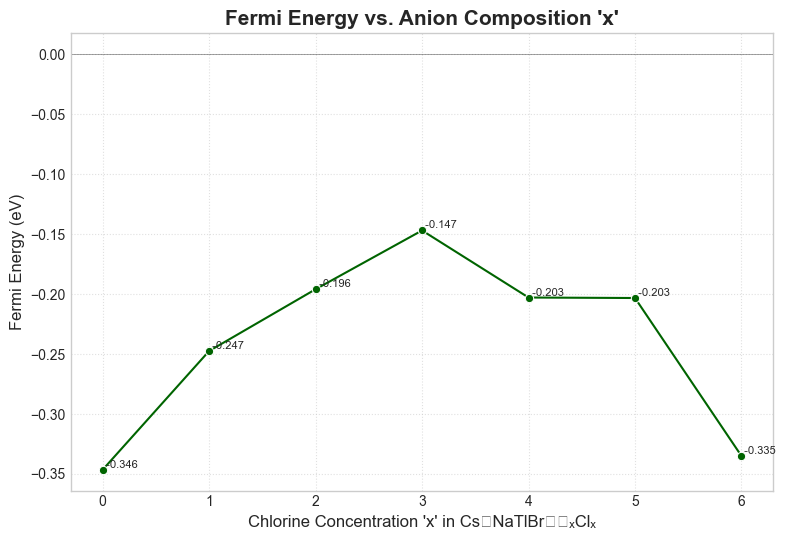

In [11]:
if not materials_df.empty and 'fermi_energy_ev' in materials_df.columns:
    print("\n--- Visualizing Fermi Energy Trend vs. Anion Composition 'x' ---")
    
    plt.figure(figsize=(8, 5.5))
    
    sns.lineplot(data=materials_df, x='material_x_value', y='fermi_energy_ev', marker='o', 
                 color='darkgreen', errorbar=None) # No error bars needed for raw data trend
    
    # Adding data point values on the plot
    for index, row in materials_df.iterrows():
        if pd.notna(row['fermi_energy_ev']):
            plt.text(row['material_x_value'], row['fermi_energy_ev'], f" {row['fermi_energy_ev']:.3f}", 
                     ha='left', va='bottom', fontsize=8)

    plt.xlabel("Chlorine Concentration 'x' in Cs₂NaTlBr₆₋ₓClₓ", fontsize=12)
    plt.ylabel("Fermi Energy (eV)", fontsize=12)
    plt.title("Fermi Energy vs. Anion Composition 'x'", fontsize=15, fontweight='bold')
    plt.xticks(ORDERED_X_VALUES, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.axhline(0, color='black', linestyle='-', linewidth=0.5, alpha=0.5) # Reference zero line
    plt.tight_layout()
    plt.show()
else:
    print("Materials DataFrame is empty or 'fermi_energy_ev' column missing. Cannot plot Fermi energy trend.")

In [13]:
# Close the database connection if it was opened
if conn:    
    conn.close()
    print("Database connection closed.")   

Database connection closed.
